In [1]:
from keras.models import load_model

In [3]:
input_shape = (224, 224, 3)

test_path =  '/tmp/chest_xray_new/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            color_mode="rgb",
                                            shuffle = False,
                                            class_mode='categorical',
                                            batch_size=1)

Found 587 images belonging to 2 classes.


In [7]:
%matplotlib inline 

In [8]:
import numpy as np
import math

batch_size = 1

number_of_examples = len(test_set.filenames)
number_of_generator_calls = math.ceil(number_of_examples / batch_size)

test_labels = []
test_features = []

# Iterate through the generator calls
for i in range(0, int(number_of_generator_calls)):
    # Get the labels for the current batch
    batch_labels = np.array(test_set[i][1])
    test_labels.extend(batch_labels)
    # Get features for the current batch
    batch_features = np.array(test_set[i][0])
    test_features.extend(batch_features)

In [13]:
import random
import matplotlib.pyplot as plt

In [26]:
sample_indecies = random.sample(range(len(test_labels)), 3)
sample_indecies

[326, 33, 480]

## fine-tuned InceptionV3

In [27]:
model = load_model('model_inceptionV3.h5')

In [28]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_set)

print(classification_report(np.argmax(test_labels,axis=1), np.argmax(y_pred,axis=1)))

587/587 [==============================] - 13s 20ms/step
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       159
           1       1.00      0.88      0.93       428

    accuracy                           0.91       587
   macro avg       0.87      0.94      0.90       587
weighted avg       0.93      0.91      0.91       587



actual: 1
prediction: 1


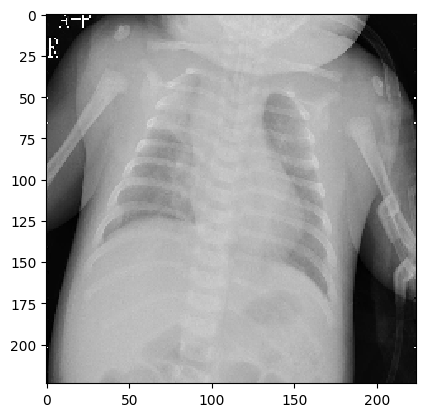

actual: 0
prediction: 0


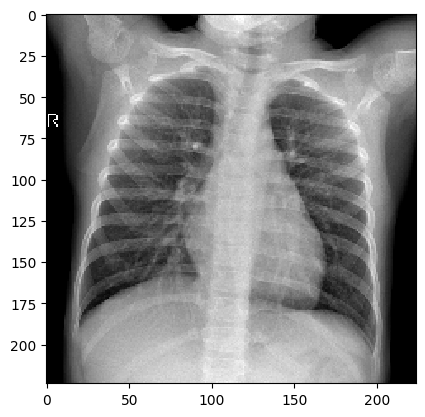

actual: 1
prediction: 1


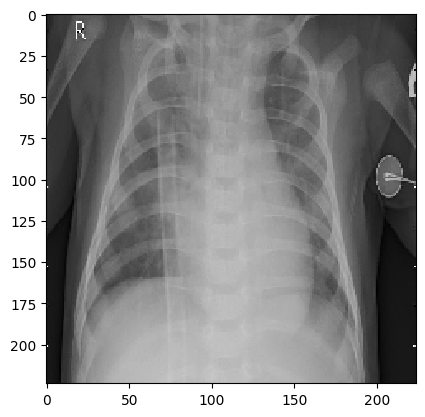

In [29]:
for sample_index in sample_indecies:
    plt.imshow(test_set[sample_index][0][0], interpolation='nearest')
    print(f"actual: {np.argmax(test_labels[sample_index])}")
    print(f"prediction: {np.argmax(y_pred[sample_index])}")
          
    plt.show()

## Fine-tuned Efv21

In [36]:
model = load_model('model_efv21.h5')

In [37]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_set)

print(classification_report(np.argmax(test_labels,axis=1), np.argmax(y_pred,axis=1)))

587/587 [==============================] - 15s 22ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       159
           1       0.73      1.00      0.84       428

    accuracy                           0.73       587
   macro avg       0.36      0.50      0.42       587
weighted avg       0.53      0.73      0.61       587



C:\Users\301212298\AppData\Local\pypoetry\Cache\virtualenvs\neural-network-winter-2024-final-project-c-p6kOt2mb-py3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\301212298\AppData\Local\pypoetry\Cache\virtualenvs\neural-network-winter-2024-final-project-c-p6kOt2mb-py3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\301212298\AppData\Local\pypoetry\Cache\virtualenvs\neural-network-winter-2024-final-project-c-p6kOt2mb-py3.10\lib\site-packages\sklearn\metrics\_classification.py:

actual: 1
prediction: 1


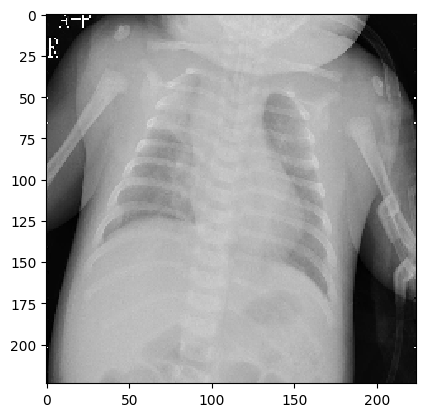

actual: 0
prediction: 1


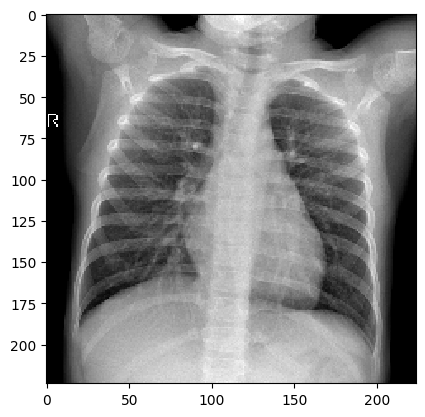

actual: 1
prediction: 1


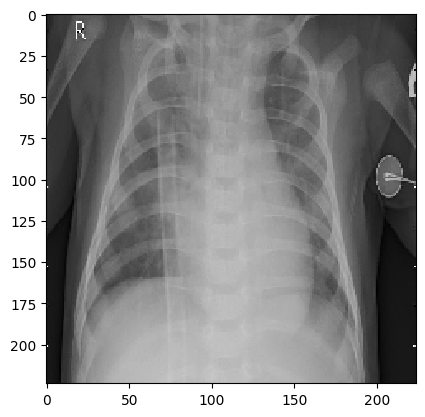

In [32]:
for sample_index in sample_indecies:
    plt.imshow(test_set[sample_index][0][0], interpolation='nearest')
    print(f"actual: {np.argmax(test_labels[sample_index])}")
    print(f"prediction: {np.argmax(y_pred[sample_index])}")
          
    plt.show()

## Fine-tuned vgg19

In [33]:
model = load_model('model_vgg19.h5')

In [34]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_set)

print(classification_report(np.argmax(test_labels,axis=1), np.argmax(y_pred,axis=1)))

587/587 [==============================] - 11s 18ms/step
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       159
           1       0.99      0.94      0.97       428

    accuracy                           0.95       587
   macro avg       0.93      0.96      0.94       587
weighted avg       0.96      0.95      0.95       587



actual: 1
prediction: 1


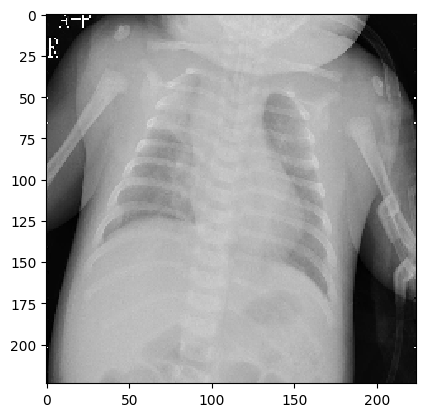

actual: 0
prediction: 0


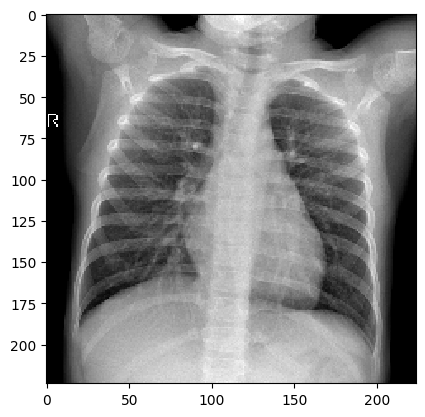

actual: 1
prediction: 1


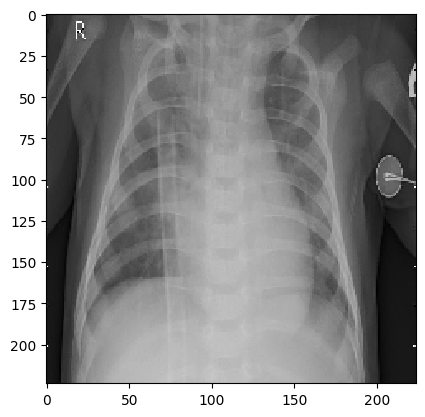

In [35]:
for sample_index in sample_indecies:
    plt.imshow(test_set[sample_index][0][0], interpolation='nearest')
    print(f"actual: {np.argmax(test_labels[sample_index])}")
    print(f"prediction: {np.argmax(y_pred[sample_index])}")
          
    plt.show()